In [1]:
using Plots
using Flux
using StaticArrays

In [33]:
n = 100
dx = rand(n)
dy = sin.(4*pi*dx) + 0.01*randn(n);

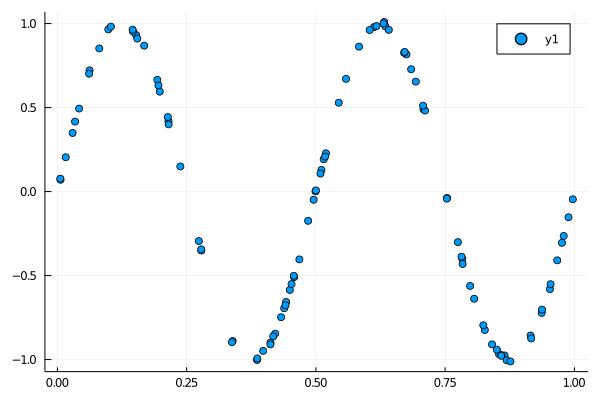

In [34]:
scatter(dx, dy)

In [35]:
m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))

Chain(Dense(1, 50, σ), Dense(50, 50, σ), Dense(50, 1))

In [43]:
# loss(x, y) = Flux.mse(m(x), y)
loss(x, y) = sum((m(x)-y).^2)

loss (generic function with 1 method)

In [44]:
ps = Flux.params(m)

Params([Float32[-0.23488574; -0.10247667; … ; -0.1660573; -0.01819168], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.23161201 -0.13084577 … -0.18549907 -0.018999923; 0.18654875 -0.115110606 … -0.08183313 -0.09261887; … ; -0.12878564 -0.016604515 … -0.11319688 0.17116475; -0.15302198 -0.042052425 … 0.13397749 -0.21818909], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.015388531 -0.10165686 … 0.005640071 -0.008079558], Float32[0.0]])

In [45]:
data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)]

100-element Array{Tuple{SArray{Tuple{1},Float64,1,1},SArray{Tuple{1},Float64,1,1}},1}:
 ([0.6842729469297271], [0.7281087004974399])
 ([0.8267109416166469], [-0.8242264742713127])
 ([0.8542928497058087], [-0.9671562606711177])
 ([0.5106984629361975], [0.12879290940922938])
 ([0.8238236277405735], [-0.796036603747138])
 ([0.8650017040352855], [-0.9755840008659046])
 ([0.5193473392112968], [0.22796215943462356])
 ([0.21492892281800713], [0.4183161434773071])
 ([0.798242249442267], [-0.5617170843030479])
 ([0.19329395414698625], [0.6649734884200779])
 ([0.7831950255089082], [-0.40045665442040596])
 ([0.7081429456089885], [0.49012817454560886])
 ([0.38621814254596876], [-1.0024127671879128])
 ⋮
 ([0.9667879807758337], [-0.40942727060319034])
 ([0.005630674198066066], [0.0768191501117288])
 ([0.2784022755097535], [-0.35105658562356207])
 ([0.6716184327749128], [0.8312343243331386])
 ([0.4120855177126226], [-0.9098974927602826])
 ([0.9164173577366908], [-0.874504914656641])
 ([0.103556075874

810

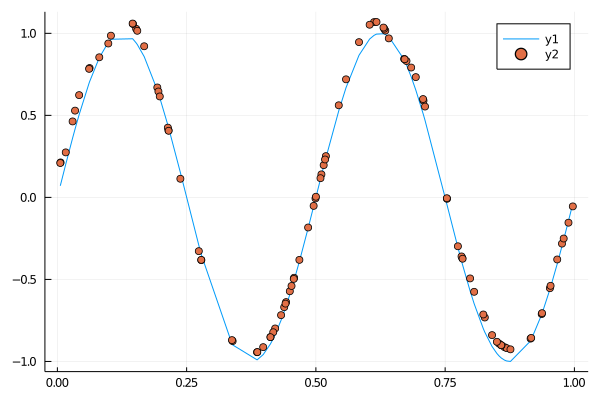

LoadError: InterruptException:

In [46]:
for i in 1:1000
    Flux.train!(loss, ps, data, ADAM())
    if i%10 == 0
        p = plot(sort(dx), x->(sin(4*pi*x)))
        scatter!(p, dx, [first(y) for y in m.(d[1] for d in data)])
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end

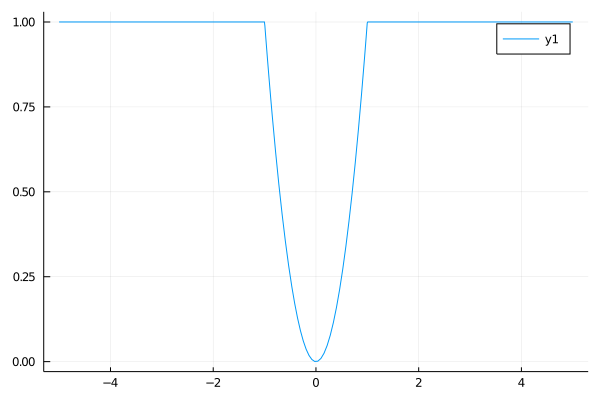

In [41]:
mynl(x) = min(1.0, max(0.0, x^2))
plot(mynl)

In [42]:
m = Chain(Dense(1,50,mynl), Dense(50,50,mynl), Dense(50,1))

Chain(Dense(1, 50, mynl), Dense(50, 50, mynl), Dense(50, 1))

In [13]:
@which Dense(50,50, σ)

(::Type{Dense})(in::Integer, out::Integer, σ; initW, initb) in Flux at /home/zach/.julia/packages/Flux/goUGu/src/layers/basic.jl:114

In [47]:
using Zygote

In [48]:
f(x) = 5x+3

f (generic function with 1 method)

In [49]:
f'(10)

5

In [50]:
@code_llvm f'(1)


;  @ /home/zach/.julia/packages/Zygote/KpME9/src/compiler/interface.jl:52 within `#43'
define i64 @"julia_#43_8530"(i64) {
top:
  ret i64 5
}


In [51]:
function g(x)
    y = zero(x)
    for i in 1:10
        y += x
    end
    return y
end

g (generic function with 1 method)

In [52]:
g'(5)

10

In [53]:
using BenchmarkTools
@benchmark g'(5)

BenchmarkTools.Trial: 
  memory estimate:  3.84 KiB
  allocs estimate:  88
  --------------
  minimum time:     8.762 μs (0.00% GC)
  median time:      11.688 μs (0.00% GC)
  mean time:        14.087 μs (0.00% GC)
  maximum time:     100.771 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [54]:
@benchmark g(5)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     2.117 ns (0.00% GC)
  median time:      2.221 ns (0.00% GC)
  mean time:        2.594 ns (0.00% GC)
  maximum time:     38.185 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1000

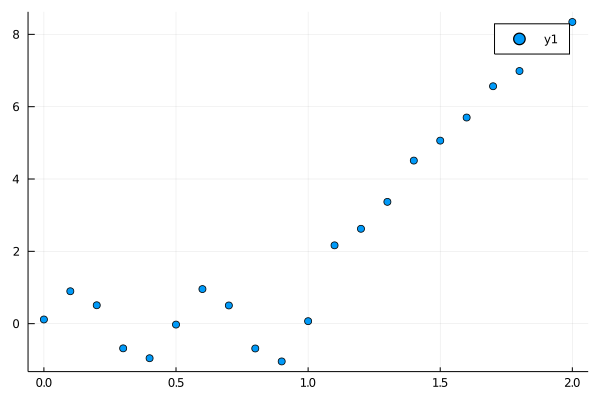

In [60]:
scatter(0.0:0.1:2.0, [first(y) for y in m.([x] for x in 0.0:0.1:2.0)])
